# Week 8 - Self Organizing Maps

# Install MiniSom Package

In [1]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=7a56f57881279fc4340077a0e6383d5beaf3af69c65bf0ca4fcb605f4818adf6
  Stored in directory: /home/kev/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built MiniSom


# 1. Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Importing the dataset

In [5]:
dataset = pd.read_csv('Credit_Card_Applications-1.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

# 3. Feature Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

# 4. Training the SOM


In [7]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# 5. Visualizing the results


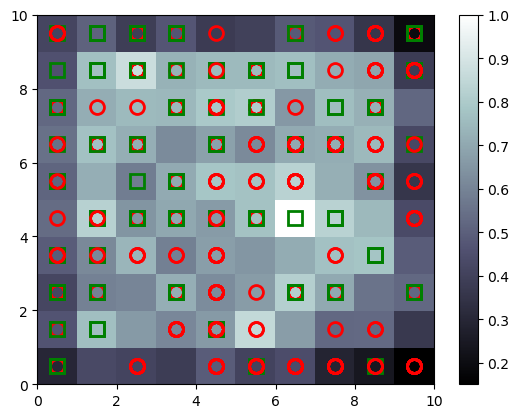

In [8]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

# 6. Finding the frauds


In [10]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)

# 7. Printing the Fraudulent Clients

In [12]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15752139
15782089
15660390
15577515
15644878
